<a href="https://colab.research.google.com/github/BesteKarnibat/marketing-performance-analysis/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('/content/marketing_campaign_dataset.csv')
data['Acquisition_Cost'] = data['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float) #convert string column to float

data.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566.0,5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200.0,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [ ]:
def cost_per_click(cost, clicks): #CPC Calculation
    if isinstance(clicks, pd.Series):
        return cost.div(clicks).replace([np.inf, -np.inf], 0).fillna(0) #dividing each row of Cost by each row of clicks in grouped_data
    elif isinstance(clicks, (int, float)):
      if clicks == 0:
          return 0
      return cost / clicks
    else:
        raise ValueError("Invalid input type for clicks")

In [ ]:
grouped_data = data.groupby('Campaign_Type').agg({'Acquisition_Cost':'sum', 'Clicks':'sum'}).reset_index() # group data according to campaign type

grouped_data['Cost_per_Click'] = cost_per_click(grouped_data['Acquisition_Cost'], grouped_data['Clicks']) # calculate CPC for each campaign type
grouped_data.head()

,Campaign_Type,Acquisition_Cost,Clicks,Cost_per_Click
0,Display,500158774.0,22030979,22.702521
1,Email,498189449.0,21897902,22.750556
2,Influencer,502400525.0,22037657,22.797366
3,Search,501911760.0,22032144,22.780886
4,Social Media,498218100.0,21955724,22.691946


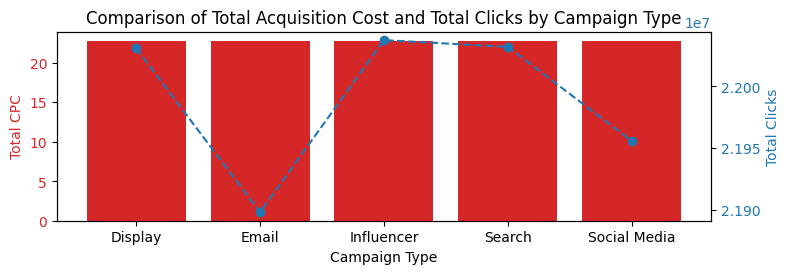

In [ ]:
# Visualize Data
fig, ax1 = plt.subplots(figsize=(8, 3))

scolor = 'tab:red'
ax1.set_xlabel('Campaign Type')
ax1.set_ylabel('Total CPC', color=scolor)
ax1.bar(grouped_data['Campaign_Type'], grouped_data['Cost_per_Click'], color=scolor)
ax1.tick_params(axis='y', labelcolor=scolor)

ax2 = ax1.twinx()
dcolor = 'tab:blue'
ax2.set_ylabel('Total Clicks', color=dcolor)
ax2.plot(grouped_data['Campaign_Type'], grouped_data['Clicks'], color=dcolor, marker='o', linestyle='dashed')
ax2.tick_params(axis='y', labelcolor=dcolor)

plt.title('Comparison of Total Acquisition Cost and Total Clicks by Campaign Type')
fig.tight_layout()
plt.show()

In [ ]:
data[data['Conversion_Rate'] > 0.05].head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566.0,5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200.0,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
5,6,DataTech Solutions,Display,All Ages,15 days,Instagram,0.07,9716.0,4.36,New York,German,100,1643,1,Foodies,2021-01-06
6,7,NexGen Systems,Email,Women 35-44,60 days,Website,0.13,11067.0,2.86,Los Angeles,Spanish,817,8749,10,Tech Enthusiasts,2021-01-07
